# Rainbow Six Seige Gambling
In raindbow six seige you have a points bar that increases as you play the game. Then these points are used to calculate a win probability for a random reward. 

At first you have 0 points leading to a 0% chance of winning, then you points increase to some threshold(`T` points) where you have a 100% chance of winning. Once you open the box your points are reset and you either win and get a gift or less determined by your points

This notebook will simulte a player continually waiting until they have some win probabilty($p_{target}$) then always submitting. Which is the best choice of $p_{target}$?lets find out.

In [18]:
%pip install matplotlib numpy tqdm > /dev/null

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Note: you may need to restart the kernel to use updated packages.


## Linear Probability
Lets assume the following relation between points and win probabilty

$p(win) = 
\begin{dcases}
    points / 100 & points\leq 100 \\
    100 & otherwise \\
\end{dcases}
$

100%|██████████| 1000/1000 [00:50<00:00, 19.95it/s]


Text(0.5, 0, 'Threshold Prob(%)')

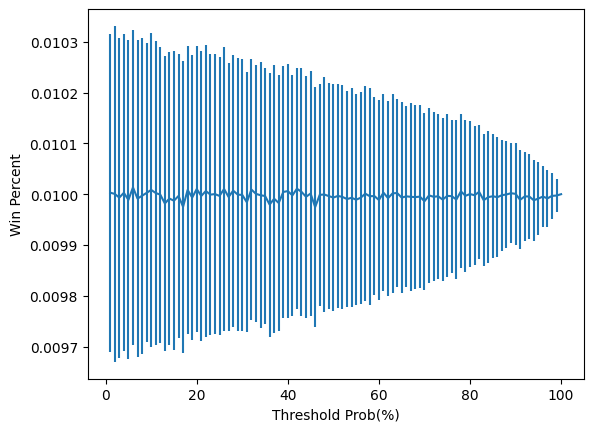

In [61]:
import random

win_prob = lambda points: min(points / 100, 1)

def simulate_threshold_points(points_thres):
    total_plays = int(100_000 / points_thres)
    wins = 0
    for _ in range(total_plays):
        if random.random() < win_prob(points_thres):
            wins += 1
    return wins / 100_000

ITERS = 1000
v_simulate_threshold_points = np.vectorize(simulate_threshold_points)
X = np.arange(1,101)
Ys = np.zeros(shape=(ITERS, 100))
for i in tqdm(range(ITERS)):
    Y_ins = v_simulate_threshold_points(X)
    Ys[i, :] = Y_ins
# plt.plot(X,Y)
Yavg = Ys.sum(axis=0) / Ys.shape[0]
Ystd = np.std(Ys, axis=0)
plt.errorbar(X, Yavg, Ystd)
# plt.plot(Yavg)
plt.ylabel('Win Percent')
plt.xlabel("Threshold Prob(%)")

# Yavg, Ystd

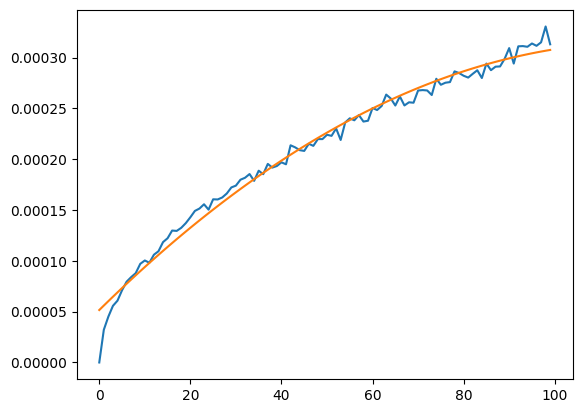

In [64]:
plt.plot(Ystd[::-1])

z = np.polyfit(np.arange(1,101), Ystd[::-1], 2)
p = np.poly1d(z)
Y_fit = p(np.arange(1,101))

# Y_fit = 0.00005 * np.log(np.arange(1,101))

plt.plot(Y_fit)

## Quadratic Probability
Lets assume the following relation between points and win probabilty


$p(win) = 
\begin{dcases}
    points**2 / 10000 & points\leq 100 \\
    100 & otherwise \\
\end{dcases}
$

100%|██████████| 1000/1000 [00:58<00:00, 17.08it/s]


Text(0.5, 0, 'Threshold Prob(%)')

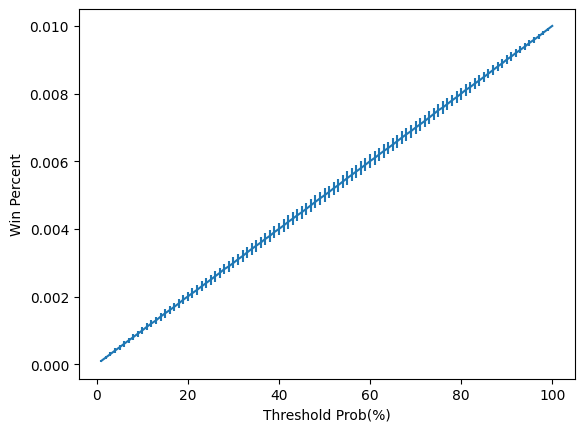

In [66]:
win_prob = lambda points: min(points**2 / 10000, 1)

def simulate_threshold_points(points_thres):
    total_plays = int(100_000 / points_thres)
    wins = 0
    for _ in range(total_plays):
        if random.random() < win_prob(points_thres):
            wins += 1
    return wins / 100_000

ITERS = 1000
v_simulate_threshold_points = np.vectorize(simulate_threshold_points)
X = np.arange(1,101)
Ys = np.zeros(shape=(ITERS, 100))
for i in tqdm(range(ITERS)):
    Y_ins = v_simulate_threshold_points(X)
    Ys[i, :] = Y_ins
# plt.plot(X,Y)
Yavg = Ys.sum(axis=0) / Ys.shape[0]
Ystd = np.std(Ys, axis=0)
plt.errorbar(X, Yavg, Ystd)
# plt.plot(Yavg)
plt.ylabel('Win Percent')
plt.xlabel("Threshold Prob(%)")